In [72]:
import os
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [73]:
path = "nhnaes-dataset"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)


Files and directories in ' nhnaes-dataset ' :
['dietary_clean.csv', 'occupation_clean.csv', 'occupations_unclean.csv', 'example_0 - merge_datasets_together.Rmd', 'comments_unclean.csv', 'comments_clean.csv', 'chemicals_unclean.csv', 'weights_unclean.csv', 'dictionary_nhanes.csv', 'dietary_unclean.csv', 'nhanes_inconsistencies_documentation.xlsx', 'm - nhanes_1988_2018.R', 'weights_clean.csv', 'example_1 - account_for_nhanes_design.Rmd', 'w - nhanes_1988_2018.RData', 'medications_unclean.csv', 'response_clean.csv', 'mortality_unclean.csv', 'questionnaire_unclean.csv', 'demographics_unclean.csv', 'example_3 - run_multiple_regressions.Rmd', 'demographics_clean.csv', 'mortality_clean.csv', 'medications_clean.csv', 'dictionary_harmonized_categories.csv', 'chemicals_clean.csv', 'response_unclean.csv', 'dictionary_drug_codes.csv', 'example_2 - calculate_summary_statistics.Rmd', 'questionnaire_clean.csv']


In [74]:
pd.reset_option('display.max_columns')


In [75]:
pd.set_option('display.max_columns', None)  # No limit on column display
df_health_raw = pd.read_csv("nhnaes-dataset/response_clean.csv",    low_memory=False)
for col in df_health_raw.columns:
    print(col)

SEQN
SEQN_new
SDDSRVYR
LBXSATSI2
LBXSATSI
LBXSATSI1
LBDSATLC
LBDSALSI2
LBXSAL2
URXUMA2
LBDSALSI
LBDSALSI1
LBXSAL
LBXSAL1
URXUMA
URXUMA1
URXUMS
LBXSAPSI2
LBXSAPSI
LBXSAPSI1
RFP2
TEP2
SSTOXG2
L1P
RFP
RFP1
HPP
TEP
TEP1
SSTOXG
SSTOXG1
TMP2
TMP
TMP1
HPPCAG
SSTOXAV
SSTOXM
AAP2
AAPSI2
LBDAPBSI2
LBXAPB2
AAP
AAP1
AAPSI
AAPSI1
LBDAPBSI
LBDAPBSI1
LBXAPB
LBXAPB1
LBXSASSI2
LBXSASSI
LBXSASSI1
LBXSC3SI2
LBXSC3SI
LBXSC3SI1
LBDSTBSI2
LBXSTB2
LBDSTBSI
LBDSTBSI1
LBXSTB
LBXSTB1
LBDSTBLC
BIAEXSTS
BIAREACT
BIAREACT1
BIAREACT2
BIARESIST
BIARESIST1
BIARESIST2
BIDALPHA
BIDCM
BIDECF
BIDFAT
BIDFC
BIDFFM
BIDFIT
BIDICF
BIDPFAT
BIDRECF
BIDRICF
BIDTBW
BIDTD
BIXC005K
BIXC006K
BIXC007K
BIXC008K
BIXC009K
BIXC010K
BIXC011K
BIXC012K
BIXC013K
BIXC014K
BIXC015K
BIXC016K
BIXC018K
BIXC020K
BIXC023K
BIXC025K
BIXC028K
BIXC031K
BIXC035K
BIXC039K
BIXC043K
BIXC050K
BIXC054K
BIXC060K
BIXC067K
BIXC075K
BIXC083K
BIXC093K
BIXC100K
BIXC115K
BIXC128K
BIXC143K
BIXC159K
BIXC177K
BIXC1M
BIXC200K
BIXC220K
BIXC245K
BIXC273K
BIXC304K
BIXC339

In [76]:
df_dietary_raw = pd.read_csv("nhnaes-dataset/dietary_clean.csv",    low_memory=False)
df_dietary_raw.columns.tolist()

['Unnamed: 0',
 'SEQN_new',
 'SEQN',
 'SDDSRVYR',
 'RIDAGEYR',
 'RIAGENDR',
 'survey_day',
 'WTDRD1',
 'WTDR4YR',
 'DRXEXMER',
 'DRASCST2',
 'DRDAINMD',
 'DRDINTMD',
 'DRXDAY',
 'DRXLANG',
 'DRXDRSTZ',
 'DRXMRESP',
 'DRXTNUMF',
 'WTDRXD',
 'DRABF',
 'DRDINT',
 'DRXHELP',
 'DRXDBIH',
 'DRPIID',
 'DRPQ5',
 'DRPQ6',
 'DRPQ7',
 'DRPQ8',
 'DRPQ9',
 'DRPQ10',
 'DRPQ11',
 'DRPQ12',
 'DRXTKCAL',
 'DRXTPROT',
 'DRXTCARB',
 'DRXTTFAT',
 'DRXTSFAT',
 'DRXTMFAT',
 'DRXTPFAT',
 'DRXTCHOL',
 'DRXTFIBE',
 'DRXTVAIU',
 'DRXTVARA',
 'DRXTCARO',
 'DRXTVB1',
 'DRXTVB2',
 'DRXTNIAC',
 'DRXTVB6',
 'DRXTFOLA',
 'DRXTVB12',
 'DRXTVC',
 'DRXTATOC',
 'DRXTCALC',
 'DRXTPHOS',
 'DRXTMAGN',
 'DRXTIRON',
 'DRXTZINC',
 'DRXTCOPP',
 'DRXTSODI',
 'DRXTPOTA',
 'DRXTSELE',
 'DRXTCAFF',
 'DRXTTHEO',
 'DRXTALCO',
 'DRXTMOIS',
 'DRXTS040',
 'DRXTS060',
 'DRXTS080',
 'DRXTS100',
 'DRXTS120',
 'DRXTS140',
 'DRXTS160',
 'DRXTS180',
 'DRXTM161',
 'DRXTM181',
 'DRXTM201',
 'DRXTM221',
 'DRXTP182',
 'DRXTP183',
 'DRXTP184',
 'D

In [77]:
df_dempographic_raw = pd.read_csv("nhnaes-dataset/demographics_clean.csv",    low_memory=False)
df_dempographic_raw.columns.tolist()

['SEQN',
 'SEQN_new',
 'AIALANGA',
 'DMAETHN',
 'DMAETHNR',
 'DMARACE',
 'DMARACER',
 'DMDBORN4',
 'DMDCITZN',
 'DMDEDUC',
 'DMDEDUC2',
 'DMDEDUC3',
 'DMDFMSIZ',
 'DMDHHSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'DMDHHSZE',
 'DMDHRAGE',
 'DMDHRBR4',
 'DMDHREDU',
 'DMDHRGND',
 'DMDHRMAR',
 'DMDHSEDU',
 'DMDMARTL',
 'DMDSCHOL',
 'DMDYRSUS',
 'DMPCNTYR',
 'DMPCREGN',
 'DMPFIPSR',
 'DMPFSEQ',
 'DMPMETRO',
 'DMQADFC',
 'DMQMILIZ',
 'FIAINTRP',
 'FIALANG',
 'FIAPROXY',
 'HAA1',
 'HAA2',
 'HAA2A',
 'HAA3',
 'HAA4',
 'HAA5',
 'HAA6A',
 'HAA6B',
 'HAA6C',
 'HAA6D',
 'HAD2',
 'HAINTVR',
 'HALANG',
 'HAV10R',
 'HAV11',
 'HAV1S',
 'HAV2S',
 'HAV3S',
 'HAV4S',
 'HAV5',
 'HAV6S',
 'HAV7R',
 'HAV8',
 'HAV9',
 'HAVERS',
 'HAY10',
 'HAY6',
 'HAY7',
 'HAY8',
 'HAY9',
 'HFA13',
 'HFAGERR',
 'HFC1',
 'HFC10',
 'HFC11',
 'HFC7S',
 'HFC8S',
 'HFC9',
 'HFE1',
 'HFE10',
 'HFE11',
 'HFE12',
 'HFE13',
 'HFE14',
 'HFE15',
 'HFE16',
 'HFE17',
 'HFE18',
 'HFE2',
 'HFE3',
 'HFE4',
 'HFE5',
 'HFE6',
 'HFE7',
 'HFE8A',
 'HFE8B

In [78]:
selected_response_clean_list = ['SEQN','LBXGLU','LBXGH','BPXSY1','BPXDI1','BMXBMI','LBDHDD','LBXHGB']
selected_lab_df = df_health_raw[selected_response_clean_list]
selected_lab_df

,SEQN,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB
0,9,130.525000,5.35,130.0,74.0,27.50,62.5,13.075
1,48,84.900000,4.85,132.0,80.0,36.25,40.5,13.275
2,92,NaN,4.65,96.0,23.0,26.15,52.5,12.350
3,94,NaN,5.90,103.0,52.0,21.90,41.5,12.150
4,106,98.933333,5.25,154.0,84.0,25.55,41.5,14.750
...,...,...,...,...,...,...,...,...
131025,102751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131026,102804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131027,102825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131028,102940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
selected_demographics_list = ['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3']
selected_demographic_df = df_dempographic_raw[selected_demographics_list]
selected_demographic_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3
0,3,1,21,NaN
1,4,2,32,NaN
2,9,2,48,NaN
3,10,1,35,NaN
4,11,1,48,NaN
...,...,...,...,...
135305,102952,2,70,6.0
135306,102953,1,42,1.0
135307,102954,2,41,4.0
135308,102955,2,14,4.0


In [80]:
merged_dataset = pd.merge(selected_demographic_df,selected_lab_df,on='SEQN')
merged_dataset

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB
0,3,1,21,NaN,106.000,5.30,118.0,66.0,25.50,38.0,14.700
1,3,1,21,NaN,NaN,NaN,110.0,60.0,17.63,30.0,13.700
2,4,2,32,NaN,88.900,4.60,124.0,80.0,23.40,55.0,13.300
3,4,2,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.300
4,9,2,48,NaN,130.525,5.35,130.0,74.0,27.50,62.5,13.075
...,...,...,...,...,...,...,...,...,...,...,...
195834,102952,2,70,6.0,158.000,7.40,136.0,74.0,20.00,60.0,13.400
195835,102953,1,42,1.0,NaN,5.90,124.0,76.0,35.80,49.0,15.500
195836,102954,2,41,4.0,94.000,5.20,116.0,66.0,26.10,54.0,6.400
195837,102955,2,14,4.0,NaN,5.50,114.0,62.0,45.60,34.0,11.400


In [81]:
merged_dataset= merged_dataset.drop_duplicates(subset=['SEQN'])
merged_dataset

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB
0,3,1,21,NaN,106.000,5.30,118.0,66.0,25.5,38.0,14.700
2,4,2,32,NaN,88.900,4.60,124.0,80.0,23.4,55.0,13.300
4,9,2,48,NaN,130.525,5.35,130.0,74.0,27.5,62.5,13.075
6,10,1,35,NaN,85.500,4.60,126.0,80.0,29.4,43.0,16.300
8,11,1,48,NaN,271.700,9.10,110.0,68.0,25.0,51.0,15.200
...,...,...,...,...,...,...,...,...,...,...,...
195834,102952,2,70,6.0,158.000,7.40,136.0,74.0,20.0,60.0,13.400
195835,102953,1,42,1.0,NaN,5.90,124.0,76.0,35.8,49.0,15.500
195836,102954,2,41,4.0,94.000,5.20,116.0,66.0,26.1,54.0,6.400
195837,102955,2,14,4.0,NaN,5.50,114.0,62.0,45.6,34.0,11.400


In [82]:
print(f"Missing values left: {merged_dataset.isnull().sum().sum()} ")


Missing values left: 267180 


In [83]:
missing_percentage = (merged_dataset.isnull().sum() / len(merged_dataset)) * 100
print("\\n--- Percentage of Missing Values per Column ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

\n--- Percentage of Missing Values per Column ---
LBXGLU      62.474418
RIDRETH3    61.614871
LBXGH       31.656501
BPXDI1      29.187673
BPXSY1      29.158722
LBDHDD      25.095588
LBXHGB      16.292466
BMXBMI      11.248989
dtype: float64


In [84]:
essential_cols = [
    'RIAGENDR', 'RIDAGEYR', 'LBXGLU', 'LBXGH', 'BPXSY1', 'BPXDI1',
    'BMXBMI', 'LBDHDD', 'LBXHGB'
]
cleaned_df = merged_dataset.dropna(subset=essential_cols)
selected_df = cleaned_df
print(f"Shape after dropping missing rows: {cleaned_df.shape}")
print(f"Missing values left: {cleaned_df.isnull().sum().sum()}")

Shape after dropping missing rows: (33989, 11)
Missing values left: 23187


In [85]:
missing_percentage = (cleaned_df.isnull().sum() / len(cleaned_df)) * 100
print("\\n--- Percentage of Missing Values per Column ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

\n--- Percentage of Missing Values per Column ---
RIDRETH3    68.21913
dtype: float64


In [86]:
mode_value = cleaned_df['RIDRETH3'].mode()[0]
cleaned_df['RIDRETH3'].fillna(mode_value, inplace=True)
print(f"Missing values left: {cleaned_df.isnull().sum().sum()}")

Missing values left: 0


In [87]:
cleaned_df['diabetes_risk'] = np.where(
    (cleaned_df['LBXGLU'] >= 126) | (cleaned_df['LBXGH'] >= 6.5), 1, 0
)
cleaned_df['hypertension_risk'] = np.where(
    (cleaned_df['BPXSY1'] >= 130) | (cleaned_df['BPXDI1'] >= 80), 1, 0
)
cleaned_df['obesity_risk'] = np.where(cleaned_df['BMXBMI'] >= 30, 1, 0)
cleaned_df['low_hdl_risk'] = np.where(
    ((cleaned_df['RIAGENDR'] == 1) & (cleaned_df['LBDHDD'] < 40)) |
    ((cleaned_df['RIAGENDR'] == 2) & (cleaned_df['LBDHDD'] < 50)), 1, 0
)
cleaned_df['anemia_risk'] = np.where(
    ((cleaned_df['RIAGENDR'] == 1) & (cleaned_df['LBXHGB'] < 13.0)) |
    ((cleaned_df['RIAGENDR'] == 2) & (cleaned_df['LBXHGB'] < 12.0)), 1, 0
)
cleaned_df['pre_diabetes_risk'] = np.where(
    ((cleaned_df['LBXGLU'] >= 100) & (cleaned_df['LBXGLU'] <= 125)) |
    ((cleaned_df['LBXGH'] >= 5.7) & (cleaned_df['LBXGH'] < 6.5)), 1, 0
)

In [88]:
cleaned_df.shape

(33989, 17)

In [89]:
risk_columns = [
    'diabetes_risk', 'hypertension_risk', 'obesity_risk',
    'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk'
]
y = cleaned_df[risk_columns]
X = cleaned_df.drop(columns=risk_columns + ['SEQN'])


In [90]:
print(f"\\nFinal shape of X: {X.shape}")
print(f"Final shape of y: {y.shape}")
print("\\n--- X (Features) Head ---")
print(X.head())

\nFinal shape of X: (33989, 10)
Final shape of y: (33989, 6)
\n--- X (Features) Head ---
   RIAGENDR  RIDAGEYR  RIDRETH3   LBXGLU  LBXGH  BPXSY1  BPXDI1  BMXBMI  \
0         1        21       3.0  106.000   5.30   118.0    66.0    25.5   
2         2        32       3.0   88.900   4.60   124.0    80.0    23.4   
4         2        48       3.0  130.525   5.35   130.0    74.0    27.5   
6         1        35       3.0   85.500   4.60   126.0    80.0    29.4   
8         1        48       3.0  271.700   9.10   110.0    68.0    25.0   

   LBDHDD  LBXHGB  
0    38.0  14.700  
2    55.0  13.300  
4    62.5  13.075  
6    43.0  16.300  
8    51.0  15.200  


In [91]:
y_target = y['anemia_risk']

print("--- Class Distribution for Anemia Risk ---")
print(y_target.value_counts())

--- Class Distribution for Anemia Risk ---
anemia_risk
0    30525
1     3464
Name: count, dtype: int64


In [92]:
X_train_anemia, X_test_anemia, y_train_anemia, y_test_anemia = train_test_split(
    X, y_target,
    test_size=0.2,
    random_state=42,
    stratify=y_target
)
print("--- Verifying Training Data Shapes ---")
print(f"Shape of X_train_anemia: {X_train_anemia.shape}")
print(f"Shape of y_train_anemia: {y_train_anemia.shape}")
print("------------------------------------\\n")

--- Verifying Training Data Shapes ---
Shape of X_train_anemia: (27191, 10)
Shape of y_train_anemia: (27191,)
------------------------------------\n


In [93]:
anemia_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Training the anemia model...")
# This should now work without error
anemia_model.fit(X_train_anemia, y_train_anemia)


Training the anemia model...


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [94]:
print(" Anemia Model Performance ")
y_pred_anemia = anemia_model.predict(X_test_anemia)

 Anemia Model Performance 


AUC Score: 0.999


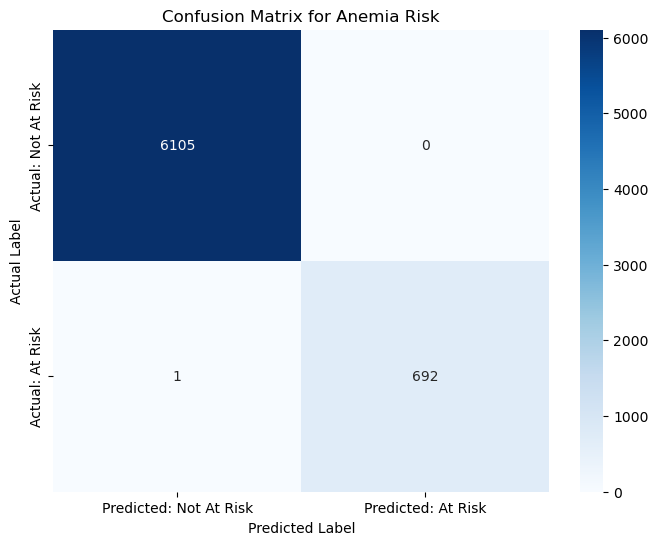

In [95]:
y_prob_anemia = anemia_model.predict_proba(X_test_anemia)[:, 1]
auc = roc_auc_score(y_test_anemia, y_prob_anemia)
print(f"AUC Score: {auc:.3f}")
cm = confusion_matrix(y_test_anemia, y_pred_anemia)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Not At Risk', 'Predicted: At Risk'],
            yticklabels=['Actual: Not At Risk', 'Actual: At Risk'])
plt.title('Confusion Matrix for Anemia Risk')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
rf_base = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'  # Handle class imbalance
    )
)
rf_base.fit(x_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=15,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_jobs=-1,
                                                       random_state=42))

In [97]:
y_pred_res = rf_base.predict(x_test)
predict_prob = rf_base.predict_proba(x_test)
# print(y_pred_res,predict_prob)
auc_scores = {}
for i, target in enumerate(risk_columns):
    auc = roc_auc_score(y_test[target], predict_prob[i][:, 1])
    auc_scores[target] = auc
    print(f"  {target}: {auc:.3f}")

  diabetes_risk: 1.000
  hypertension_risk: 1.000
  obesity_risk: 1.000
  low_hdl_risk: 1.000
  anemia_risk: 1.000
  pre_diabetes_risk: 1.000


In [98]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

mcm = multilabel_confusion_matrix(y_test, y_pred_res)


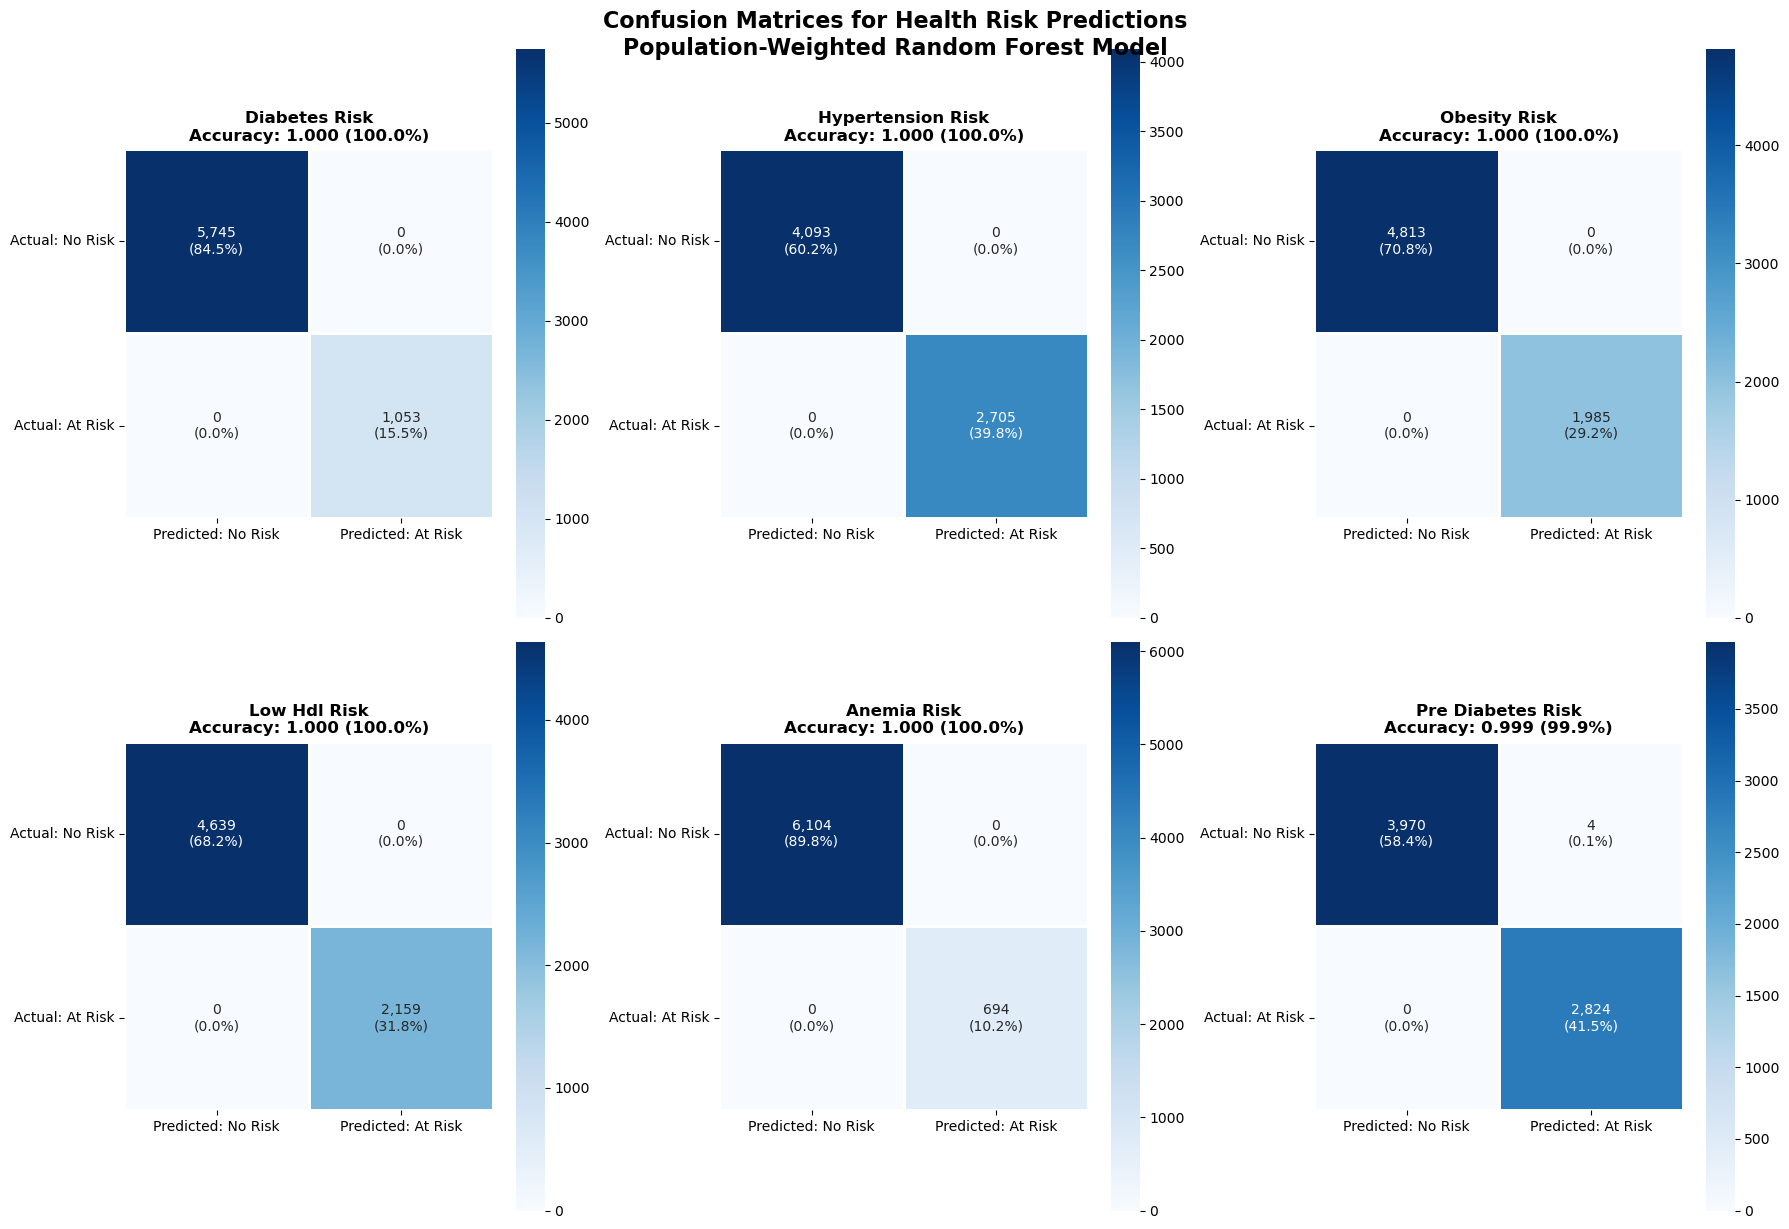

In [99]:
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

individual_accuracies = []
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_array = y_pred_res.values if hasattr(y_pred_res, 'values') else y_pred_res

for i in range(len(risk_columns)):
    acc = accuracy_score(y_test_array[:, i], y_pred_array[:, i])
    individual_accuracies.append(acc)

for i, (target, acc) in enumerate(zip(risk_columns, individual_accuracies)):
    cm = mcm[i]
    
    labels = np.array([['True Negative\n(Correct)', 'False Positive\n(Wrong)'],
                       ['False Negative\n(Wrong)', 'True Positive\n(Correct)']])
    
    total = cm.sum()
    annotations = np.empty_like(cm, dtype=object)
    for row in range(2):
        for col in range(2):
            count = cm[row, col]
            percentage = count / total * 100
            annotations[row, col] = f'{count:,}\n({percentage:.1f}%)'
    
    sns.heatmap(cm, 
                annot=annotations,
                fmt='',
                cmap='Blues',
                cbar=True,
                square=True,
                linewidths=1,
                linecolor='white',
                xticklabels=['Predicted: No Risk', 'Predicted: At Risk'],
                yticklabels=['Actual: No Risk', 'Actual: At Risk'],
                ax=axes[i])
    
    axes[i].set_title(f'{target.replace("_", " ").title()}\nAccuracy: {acc:.3f} ({acc*100:.1f}%)', 
                      fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.suptitle('Confusion Matrices for Health Risk Predictions\nPopulation-Weighted Random Forest Model', 
             y=1.02, fontsize=16, fontweight='bold')
plt.show()


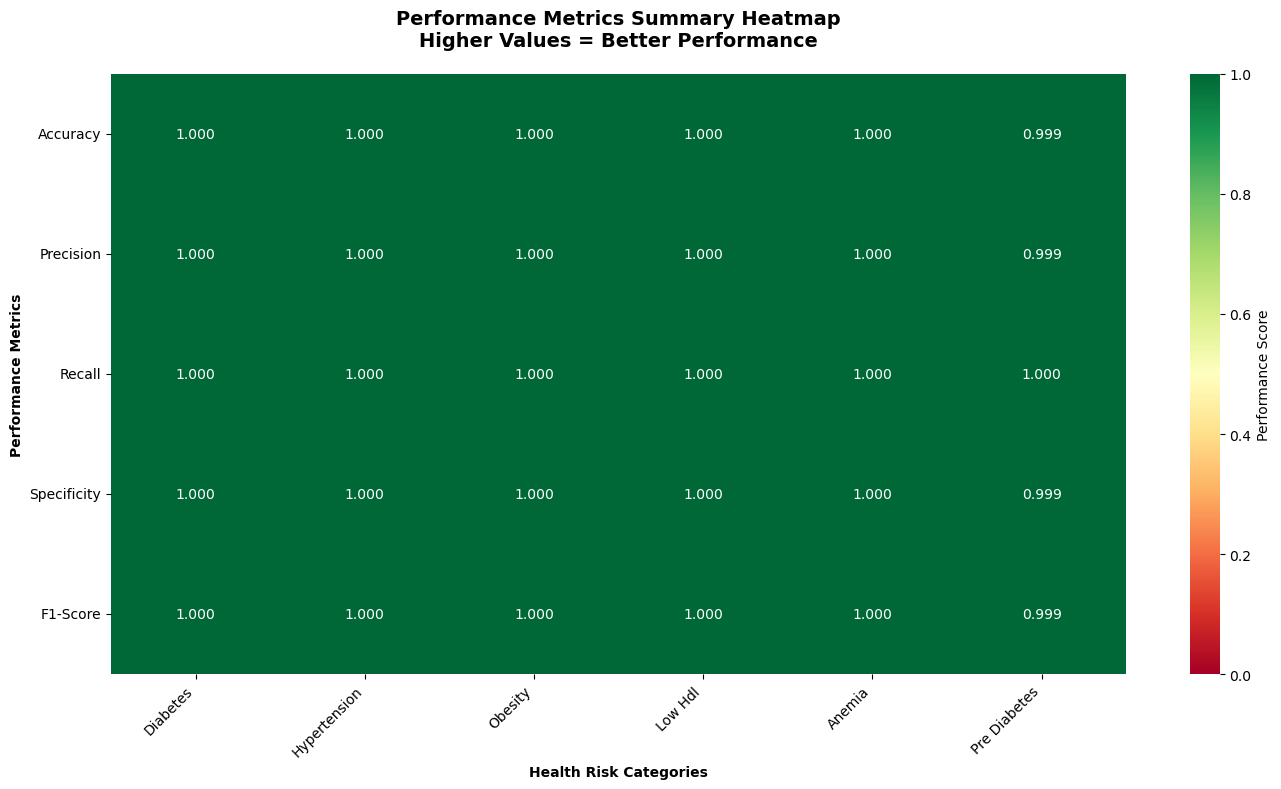

In [100]:
metrics_data = []
metric_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']

for i, target in enumerate(risk_columns):
    cm = mcm[i]
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics_data.append([accuracy, precision, recall, specificity, f1])
metrics_df = np.array(metrics_data).T  
target_names_short = [t.replace('_risk', '').replace('_', ' ').title() for t in risk_columns]

plt.figure(figsize=(14, 8))
sns.heatmap(metrics_df,
            annot=True,
            fmt='.3f',
            cmap='RdYlGn',
            center=0.5,
            vmin=0,
            vmax=1,
            xticklabels=target_names_short,
            yticklabels=metric_names,
            cbar_kws={'label': 'Performance Score'})

plt.title('Performance Metrics Summary Heatmap\nHigher Values = Better Performance', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Health Risk Categories', fontweight='bold')
plt.ylabel('Performance Metrics', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [101]:
dietary_cols_to_use = [
    'SEQN',

    'DRXTKCAL',        # Total Calories
    'DRXTPROT',        # Total Protein
    'DRXTCARB',        # Total Carbohydrates
    'DRXTTFAT',        # Total Fat
    'DRXTSFAT',        # Total Saturated Fat
    'DRXTCHOL',        # Dietary Cholesterol
    'DRXTSODI',        # Sodium
    'DRXTPOTA',        # Potassium
    'DRXTIRON',        # Iron
    'DRXTSUGR',        # Total Sugars
    'DRXTALCO',        # Alcohol Consumption

    # --- Food Group Intake Columns ---
    'DRXT_G_WHOLE',    # Whole Grains
    'DRXT_V_TOTAL',    # Total Vegetables
    'DRXT_F_TOTAL',    # Total Fruits
    'DRXT_D_TOTAL',    # Total Dairy
    'DRXT_PF_TOTAL',   # Total Protein Foods
    'DRXT_ADD_SUGARS'  # Added Sugars
]

In [118]:
selected_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3,1,21,3.0,106.000,5.30,118.0,66.0,25.5,38.0,14.700,0,0,0,1,0,1
2,4,2,32,3.0,88.900,4.60,124.0,80.0,23.4,55.0,13.300,0,1,0,0,0,0
4,9,2,48,3.0,130.525,5.35,130.0,74.0,27.5,62.5,13.075,1,1,0,0,0,0
6,10,1,35,3.0,85.500,4.60,126.0,80.0,29.4,43.0,16.300,0,1,0,0,0,0
8,11,1,48,3.0,271.700,9.10,110.0,68.0,25.0,51.0,15.200,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195829,102947,1,75,4.0,85.000,5.80,160.0,82.0,25.2,70.0,10.700,0,1,0,0,1,1
195830,102948,2,31,3.0,92.000,5.20,88.0,64.0,20.2,76.0,13.400,0,0,0,0,0,0
195834,102952,2,70,6.0,158.000,7.40,136.0,74.0,20.0,60.0,13.400,1,1,0,0,0,0
195836,102954,2,41,4.0,94.000,5.20,116.0,66.0,26.1,54.0,6.400,0,0,0,0,1,0


In [119]:
dieteray_raw_df =df_dietary_raw[dietary_cols_to_use]
dieteray_raw_df

,SEQN,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTCHOL,DRXTSODI,DRXTPOTA,DRXTIRON,DRXTSUGR,DRXTALCO,DRXT_G_WHOLE,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_D_TOTAL,DRXT_PF_TOTAL,DRXT_ADD_SUGARS
0,3.0,2726.000000,85.000000,371.500000,106.600000,39.300000,281.000000,5216.000000,4350.000000,14.800000,NaN,0.000000,0.000000,2.826530,1.152910,0.744460,7.50520,35.76656
1,3.0,2670.718424,94.107539,336.643375,102.314178,35.324120,357.750520,4495.628726,3541.321178,16.621442,NaN,4.220000,0.516859,1.947655,1.079701,1.327139,7.67730,28.99090
2,4.0,2243.000000,73.000000,294.000000,63.900000,26.400000,137.000000,2778.000000,3087.000000,21.900000,NaN,32.000000,0.000000,0.558080,0.000000,4.587200,0.60822,21.02032
3,4.0,2136.714074,75.658761,270.536334,74.073132,26.319260,250.671565,3136.605989,2736.508667,16.537881,NaN,13.807000,0.420750,1.336225,0.459618,2.312966,4.02520,20.99560
4,7.0,1520.000000,56.600000,210.000000,56.100000,15.300000,279.000000,2234.000000,2307.000000,9.800000,NaN,0.000000,3.672300,0.124790,2.671580,1.570680,4.86760,0.93701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324369,102955.0,1617.000000,58.080000,241.630000,48.710000,18.925000,95.000000,2947.000000,2215.000000,19.840000,94.090000,0.000000,1.470000,1.000000,0.000000,3.570000,1.98000,12.84000
324370,102955.0,1584.385843,52.545028,223.248783,59.160938,23.128155,169.720203,2741.693003,1860.823963,15.339002,106.219350,0.484977,1.208718,0.665408,0.323592,2.421619,NaN,NaN
324371,102956.0,1591.000000,93.910000,215.310000,40.590000,15.625000,307.000000,2077.000000,4442.000000,6.880000,130.680000,0.000000,0.000000,3.520000,0.000000,0.000000,9.26000,29.93000
324372,102956.0,1490.000000,17.050000,276.390000,39.020000,14.593000,0.000000,3024.000000,842.000000,7.530000,187.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,43.93000


In [120]:
final_df = pd.merge(selected_df,dieteray_raw_df,on='SEQN',how='left')
final_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTCHOL,DRXTSODI,DRXTPOTA,DRXTIRON,DRXTSUGR,DRXTALCO,DRXT_G_WHOLE,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_D_TOTAL,DRXT_PF_TOTAL,DRXT_ADD_SUGARS
0,3,1,21,3.0,106.0,5.3,118.0,66.0,25.5,38.0,14.7,0,0,0,1,0,1,2726.000000,85.000000,371.500000,106.600000,39.300000,281.000000,5216.000000,4350.000000,14.800000,NaN,0.000000,0.000000,2.826530,1.152910,0.744460,7.50520,35.76656
1,3,1,21,3.0,106.0,5.3,118.0,66.0,25.5,38.0,14.7,0,0,0,1,0,1,2670.718424,94.107539,336.643375,102.314178,35.324120,357.750520,4495.628726,3541.321178,16.621442,NaN,4.220000,0.516859,1.947655,1.079701,1.327139,7.67730,28.99090
2,3,1,21,3.0,106.0,5.3,118.0,66.0,25.5,38.0,14.7,0,0,0,1,0,1,1517.690000,40.190000,233.630000,49.940000,15.610000,86.220000,1676.510000,1487.160000,9.780000,NaN,0.000000,0.000000,0.767000,0.835000,1.000000,3.09200,22.41400
3,3,1,21,3.0,106.0,5.3,118.0,66.0,25.5,38.0,14.7,0,0,0,1,0,1,1783.403124,57.389904,254.736170,64.707788,21.715782,183.325891,2468.292138,1857.938397,12.513201,304.445949,0.339519,0.266883,1.116283,1.070295,1.671791,NaN,24.07708
4,4,2,32,3.0,88.9,4.6,124.0,80.0,23.4,55.0,13.3,0,1,0,0,0,0,2243.000000,73.000000,294.000000,63.900000,26.400000,137.000000,2778.000000,3087.000000,21.900000,NaN,32.000000,0.000000,0.558080,0.000000,4.587200,0.60822,21.02032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121583,102954,2,41,4.0,94.0,5.2,116.0,66.0,26.1,54.0,6.4,0,0,0,0,1,0,1835.000000,66.970000,208.830000,84.050000,16.768000,214.000000,4128.000000,1953.000000,7.560000,87.580000,0.000000,0.000000,2.050000,0.400000,0.020000,6.26000,18.09000
121584,102954,2,41,4.0,94.0,5.2,116.0,66.0,26.1,54.0,6.4,0,0,0,0,1,0,1875.971217,72.685789,224.005663,77.954252,22.303723,294.338383,3136.233170,2243.187122,13.167765,89.192174,0.782561,0.339299,1.548125,0.541924,0.763032,NaN,NaN
121585,102956,1,38,3.0,91.0,5.4,150.0,98.0,36.1,34.0,17.4,0,1,1,1,0,0,1591.000000,93.910000,215.310000,40.590000,15.625000,307.000000,2077.000000,4442.000000,6.880000,130.680000,0.000000,0.000000,3.520000,0.000000,0.000000,9.26000,29.93000
121586,102956,1,38,3.0,91.0,5.4,150.0,98.0,36.1,34.0,17.4,0,1,1,1,0,0,1490.000000,17.050000,276.390000,39.020000,14.593000,0.000000,3024.000000,842.000000,7.530000,187.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,43.93000


In [121]:
final_df= final_df.drop_duplicates(subset=['SEQN'])
final_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTCHOL,DRXTSODI,DRXTPOTA,DRXTIRON,DRXTSUGR,DRXTALCO,DRXT_G_WHOLE,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_D_TOTAL,DRXT_PF_TOTAL,DRXT_ADD_SUGARS
0,3,1,21,3.0,106.000,5.30,118.0,66.0,25.5,38.0,14.700,0,0,0,1,0,1,2726.0,85.00,371.50,106.60,39.300,281.0,5216.0,4350.0,14.80,NaN,0.0,0.00000,2.82653,1.15291,0.74446,7.50520,35.76656
4,4,2,32,3.0,88.900,4.60,124.0,80.0,23.4,55.0,13.300,0,1,0,0,0,0,2243.0,73.00,294.00,63.90,26.400,137.0,2778.0,3087.0,21.90,NaN,32.0,0.00000,0.55808,0.00000,4.58720,0.60822,21.02032
8,9,2,48,3.0,130.525,5.35,130.0,74.0,27.5,62.5,13.075,1,1,0,0,0,0,1267.0,114.10,73.00,55.60,15.600,356.0,2083.0,1499.0,8.70,NaN,0.0,0.66456,0.25704,0.00000,0.48000,12.65039,3.63076
13,10,1,35,3.0,85.500,4.60,126.0,80.0,29.4,43.0,16.300,0,1,0,0,0,0,2213.0,80.00,242.40,106.20,30.700,437.0,2668.0,2387.0,14.10,NaN,0.0,1.63260,1.60255,1.25086,0.57961,5.10257,9.74292
17,11,1,48,3.0,271.700,9.10,110.0,68.0,25.0,51.0,15.200,1,0,0,0,0,0,3488.0,125.00,304.10,204.20,51.700,322.0,6113.0,5205.0,26.10,NaN,0.0,0.00000,5.40915,5.68550,0.00000,17.43749,6.91214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121574,102947,1,75,4.0,85.000,5.80,160.0,82.0,25.2,70.0,10.700,0,1,0,0,1,1,1789.0,104.11,155.44,85.25,44.397,280.0,4000.0,2630.0,9.79,58.87,0.0,2.03000,0.22000,0.25000,4.75000,2.93000,7.64000
121577,102948,2,31,3.0,92.000,5.20,88.0,64.0,20.2,76.0,13.400,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121579,102952,2,70,6.0,158.000,7.40,136.0,74.0,20.0,60.0,13.400,1,1,0,0,0,0,1080.0,52.59,139.92,38.68,7.652,56.0,2242.0,2702.0,11.31,31.31,0.0,2.34000,3.23000,0.00000,1.16000,1.82000,0.63000
121582,102954,2,41,4.0,94.000,5.20,116.0,66.0,26.1,54.0,6.400,0,0,0,0,1,0,1757.0,72.70,218.10,66.58,20.526,361.0,2993.0,1424.0,20.55,69.20,0.0,0.00000,1.04000,0.00000,0.95000,5.72000,11.88000


In [122]:
feature_cols = [
    'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'LBXGLU', 'LBXGH', 'BPXSY1', 'BPXDI1',
    'BMXBMI', 'LBDHDD', 'LBXHGB'
] + dietary_cols_to_use[1:] # Exclude SEQN from dietary cols

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(final_df[feature_cols])
imputed_df = pd.DataFrame(imputed_data, columns=feature_cols, index=final_df.index)

final_df.update(imputed_df)

print(f"Missing values after imputation: {final_df.isnull().sum().sum()}")


Missing values after imputation: 0


In [ ]:
print(f"Missing values left: {final_df.isnull().sum().sum()}")


In [123]:
final_df['diabetes_risk'] = np.where(
    (final_df['LBXGLU'] >= 126) | (final_df['LBXGH'] >= 6.5), 1, 0
)
final_df['hypertension_risk'] = np.where(
    (final_df['BPXSY1'] >= 130) | (final_df['BPXDI1'] >= 80), 1, 0
)
final_df['obesity_risk'] = np.where(final_df['BMXBMI'] >= 30, 1, 0)
final_df['low_hdl_risk'] = np.where(
    ((final_df['RIAGENDR'] == 1) & (final_df['LBDHDD'] < 40)) |
    ((final_df['RIAGENDR'] == 2) & (final_df['LBDHDD'] < 50)), 1, 0
)
final_df['anemia_risk'] = np.where(
    ((final_df['RIAGENDR'] == 1) & (final_df['LBXHGB'] < 13.0)) |
    ((final_df['RIAGENDR'] == 2) & (final_df['LBXHGB'] < 12.0)), 1, 0
)
final_df['pre_diabetes_risk'] = np.where(
    ((final_df['LBXGLU'] >= 100) & (final_df['LBXGLU'] <= 125)) |
    ((final_df['LBXGH'] >= 5.7) & (final_df['LBXGH'] < 6.5)), 1, 0
)
final_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,LBXGLU,LBXGH,BPXSY1,BPXDI1,BMXBMI,LBDHDD,LBXHGB,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTCHOL,DRXTSODI,DRXTPOTA,DRXTIRON,DRXTSUGR,DRXTALCO,DRXT_G_WHOLE,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_D_TOTAL,DRXT_PF_TOTAL,DRXT_ADD_SUGARS
0,3,1,21,3.0,106.000,5.30,118.0,66.0,25.5,38.0,14.700,0,0,0,1,0,1,2726.0,85.000,371.500,106.600,39.3000,281.0,5216.0,4350.0,14.800,146.024,0.0,0.000000,2.826530,1.152910,0.744460,7.505200,35.766560
4,4,2,32,3.0,88.900,4.60,124.0,80.0,23.4,55.0,13.300,0,1,0,0,0,0,2243.0,73.000,294.000,63.900,26.4000,137.0,2778.0,3087.0,21.900,131.010,32.0,0.000000,0.558080,0.000000,4.587200,0.608220,21.020320
8,9,2,48,3.0,130.525,5.35,130.0,74.0,27.5,62.5,13.075,1,1,0,0,0,0,1267.0,114.100,73.000,55.600,15.6000,356.0,2083.0,1499.0,8.700,60.722,0.0,0.664560,0.257040,0.000000,0.480000,12.650390,3.630760
13,10,1,35,3.0,85.500,4.60,126.0,80.0,29.4,43.0,16.300,0,1,0,0,0,0,2213.0,80.000,242.400,106.200,30.7000,437.0,2668.0,2387.0,14.100,129.518,0.0,1.632600,1.602550,1.250860,0.579610,5.102570,9.742920
17,11,1,48,3.0,271.700,9.10,110.0,68.0,25.0,51.0,15.200,1,0,0,0,0,0,3488.0,125.000,304.100,204.200,51.7000,322.0,6113.0,5205.0,26.100,182.598,0.0,0.000000,5.409150,5.685500,0.000000,17.437490,6.912140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121574,102947,1,75,4.0,85.000,5.80,160.0,82.0,25.2,70.0,10.700,0,1,0,0,1,1,1789.0,104.110,155.440,85.250,44.3970,280.0,4000.0,2630.0,9.790,58.870,0.0,2.030000,0.220000,0.250000,4.750000,2.930000,7.640000
121577,102948,2,31,3.0,92.000,5.20,88.0,64.0,20.2,76.0,13.400,0,0,0,0,0,0,1875.4,80.924,230.578,62.188,24.0298,231.0,4180.6,2321.4,12.464,105.390,12.3,0.132912,1.443502,0.711674,1.172512,7.106572,17.387134
121579,102952,2,70,6.0,158.000,7.40,136.0,74.0,20.0,60.0,13.400,1,1,0,0,0,0,1080.0,52.590,139.920,38.680,7.6520,56.0,2242.0,2702.0,11.310,31.310,0.0,2.340000,3.230000,0.000000,1.160000,1.820000,0.630000
121582,102954,2,41,4.0,94.000,5.20,116.0,66.0,26.1,54.0,6.400,0,0,0,0,1,0,1757.0,72.700,218.100,66.580,20.5260,361.0,2993.0,1424.0,20.550,69.200,0.0,0.000000,1.040000,0.000000,0.950000,5.720000,11.880000


In [124]:
risk_columns = [
    'diabetes_risk', 'hypertension_risk', 'obesity_risk',
    'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk'
]
y_enhanced = final_df[risk_columns]
X_enhanced = final_df.drop(columns=risk_columns + ['SEQN'])


In [126]:

X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42, stratify=y_target_enhanced
)

enhanced_model = MultiOutputClassifier(RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
))

print("\\nTraining the enhanced model with dietary data...")
enhanced_model.fit(X_train, y_train)

print("\\n--- Enhanced Model Performance ---")
y_pred = enhanced_model.predict(X_test)
print(classification_report(y_test, y_pred))

\nTraining the enhanced model with dietary data...
\n--- Enhanced Model Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00      2729
           2       1.00      1.00      1.00      1988
           3       1.00      1.00      1.00      2190
           4       1.00      1.00      1.00       693
           5       1.00      1.00      1.00      2861

   micro avg       1.00      1.00      1.00     11510
   macro avg       1.00      1.00      1.00     11510
weighted avg       1.00      1.00      1.00     11510
 samples avg       0.80      0.80      0.80     11510



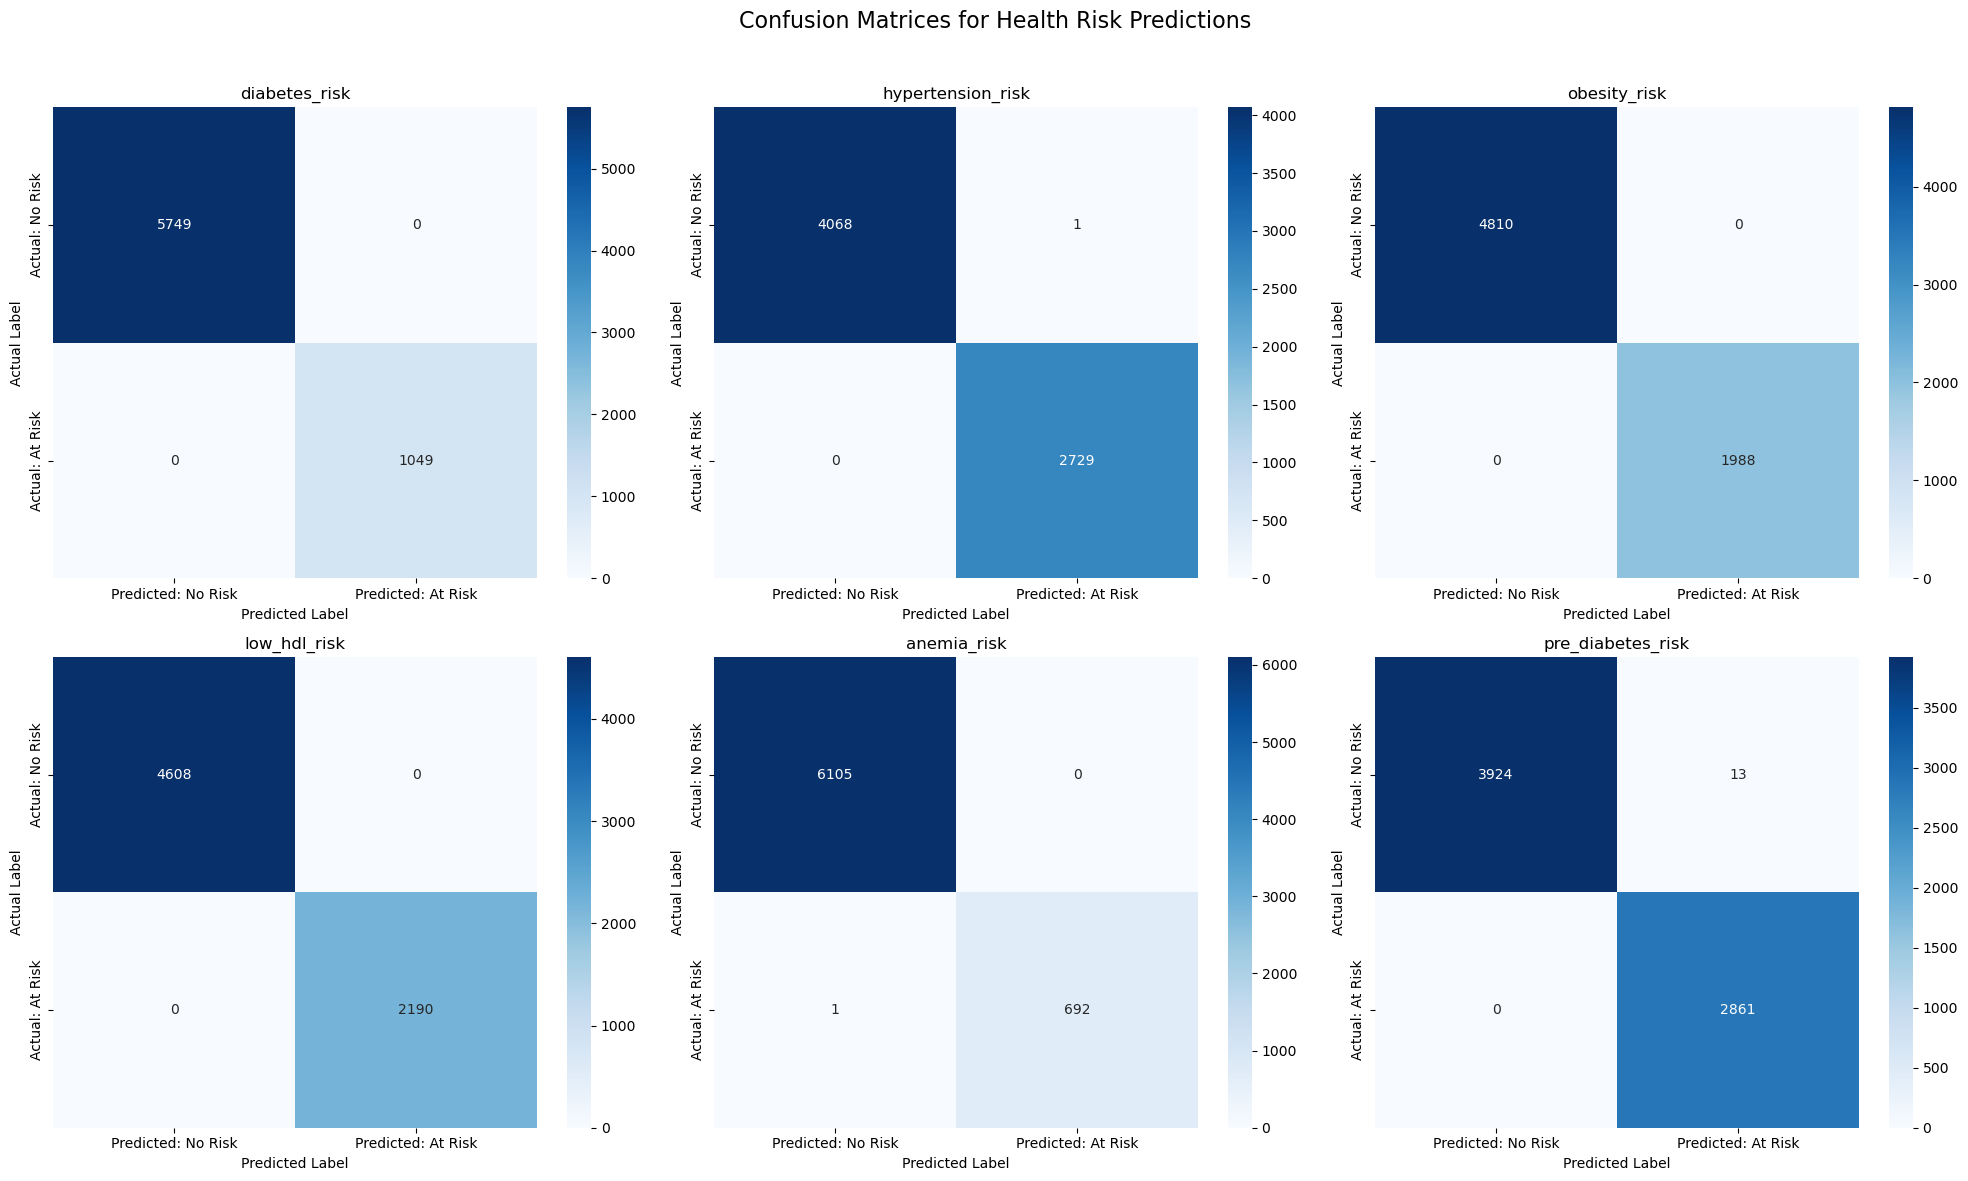

In [128]:
risk_columns = y_test.columns

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Confusion Matrices for Health Risk Predictions', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(risk_columns):
    true_labels = y_test[column]
    predicted_labels = y_pred[:, i]
    
    cm = confusion_matrix(true_labels, predicted_labels)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Predicted: No Risk', 'Predicted: At Risk'],
                yticklabels=['Actual: No Risk', 'Actual: At Risk'])
    
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('Actual Label')
    axes[i].set_xlabel('Predicted Label')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [136]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"\\nOverall Macro Average F1-Score: {f1_macro:.3f}")

--- F1-Scores for the 'At Risk' Class ---
diabetes_risk: 1.000
hypertension_risk: 1.000
obesity_risk: 1.000
low_hdl_risk: 1.000
anemia_risk: 0.999
pre_diabetes_risk: 0.998


In [137]:
risk_columns = y_test.columns

for i, column in enumerate(risk_columns):
    true_labels = y_test[column]
    predicted_labels = y_pred[:, i]
    f1 = f1_score(true_labels, predicted_labels, pos_label=1)
    print(f"{column}: {f1:.3f}")

diabetes_risk: 1.000
hypertension_risk: 1.000
obesity_risk: 1.000
low_hdl_risk: 1.000
anemia_risk: 0.999
pre_diabetes_risk: 0.998
